# Model Training

### Load the analytical base table

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

# Scikit-Learn for Modeling
import sklearn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pickle

# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
df = pd.read_csv('project_files/analytical_base_table.csv')

print(df.shape)
df.head()

(1863, 40)


,tx_price,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,0,0.000,107,9,30,19,89,6,47,58,33.000,65.000,84.000,234.000,81.000,9.000,3.000,0,1,0,27.000,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,216500,1,1,612,0,1.000,105,15,6,13,87,2,26,14,39.000,73.000,69.000,169.000,51.000,3.000,3.000,0,0,41,9.000,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,0,0.000,183,13,31,30,101,10,74,62,28.000,15.000,86.000,216.000,74.000,8.000,3.000,0,1,49,24.000,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,379900,1,1,618,33541,0.000,198,9,38,25,127,11,72,83,36.000,25.000,91.000,265.000,92.000,9.000,3.000,0,0,5,27.000,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,340000,1,1,634,0,0.000,149,7,22,20,83,10,50,73,37.000,20.000,75.000,88.000,30.000,9.000,3.000,0,0,10,27.000,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


### Split your dataset

In [4]:
# target
y = df.tx_price
# inputs
X = df.drop('tx_price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print( len(X_train), len(X_test), len(y_train), len(y_test) )

1490 373 1490 373


### Build pipelines

In [5]:
pipe = {
    'lasso': make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge': make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet': make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf': make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))   
}

### Declare hyperparams

In [6]:
# Lasso hyperparams
lasso_h = {
    'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

# Ridge hyperparams
ridge_h = {
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}
# Elastic Net hyperparams
enet_h = {    
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}
# Random forest hyperparams
rf_h = {
    'randomforestregressor__n_estimators': [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]
}
# Boosted tree hyperparams
gb_h = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [7]:
print(pipe.keys())


dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])


In [8]:
hyperparams = {
    'lasso': lasso_h,
    'ridge': ridge_h,
    'enet': enet_h,
    'rf': rf_h,
    'gb': gb_h,
}

### Fit and tune models with cross-validation

In [9]:
fitted_models = {}

for name, pipeline in pipe.items():
    model = GridSearchCV(pipeline, hyperparams[name], cv=10, n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


<br>
**Finally, run this code to check that the models have been fitted correctly.**

### Model Evaluation

In [16]:
# best_score_ for each fitted model
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.3086275085937654
ridge 0.31661115859856515
enet 0.3428746286638919
rf 0.4815967347888211
gb 0.4869720585739858


In [17]:
# r^2 and MAE of the fitted models
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print(name)
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print()

lasso
--------
R^2: 0.408886247167
MAE: 85035.5424654

ridge
--------
R^2: 0.409339647633
MAE: 84978.0356481

enet
--------
R^2: 0.405245137312
MAE: 86298.6372531

rf
--------
R^2: 0.572250974291
MAE: 67962.7578016

gb
--------
R^2: 0.541095182282
MAE: 70601.6066494



### **Result**: rf is the best model based on r^2 and MAE

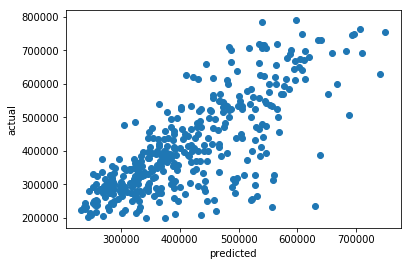

In [18]:
# performance of gb on the test set
gb_pred = fitted_models['rf'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [19]:
fitted_models['rf']

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...timators=10, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'randomforestregressor__n_estimators': [100, 200], 'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

### To get the feature importance of the winning model, RF:

In [20]:
importance = pd.DataFrame(list(zip(X.columns, np.transpose(fitted_models['rf'].best_estimator_.named_steps['randomforestregressor'].feature_importances_))) \
            ).sort_values(1, ascending=False)
importance                                                                                                                                  

,0,1
17,insurance,0.433
16,property_tax,0.125
2,sqft,0.049
22,property_age,0.044
3,lot_size,0.033
15,college_grad,0.033
13,median_age,0.032
14,married,0.029
21,during_recession,0.022
11,beauty_spas,0.022


The top 5 indicators for the transaction price of the real estate are insurance, property_tax, sqft, property_age, and lot_size)

### Save the best model

In [21]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)